In [1]:
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
# Имортируем данные
from pandas import read_csv, DataFrame
df_00 = read_csv('C:\\test.csv',',') #Для примера

In [6]:
df_00

,Price,Out,Price.1,Out.1,Price.2,Out.2,Price.3,Out.3,Price.4,Out.4,Price.5,Out.5,Price.6,Out.6,Price.7,Out.7,Price.8,Out.8,Price.9,Out.9
0,250.80,NaN,127.14,NaN,183.26,NaN,22544.0,NaN,42.60,NaN,75.26,NaN,0.90,NaN,66.40,NaN,2.35,NaN,0.3730,NaN
1,242.88,NaN,128.91,NaN,183.90,NaN,22110.0,NaN,42.92,NaN,77.01,NaN,0.60,NaN,66.28,NaN,1.79,NaN,0.3970,NaN
2,233.36,NaN,130.89,NaN,181.52,NaN,22026.0,NaN,43.34,NaN,79.65,NaN,0.56,NaN,60.84,NaN,1.56,NaN,0.3900,NaN
3,228.17,NaN,128.80,NaN,177.17,NaN,22220.0,NaN,42.50,NaN,76.17,NaN,0.56,NaN,57.44,NaN,2.00,NaN,0.3640,NaN
4,236.63,0.0,128.98,0.0,179.00,0.0,21824.0,0.0,41.69,0.0,73.96,0.0,0.55,0.0,56.66,0.0,2.14,0.0,0.3790,0.0
5,235.27,0.0,132.05,0.0,177.00,0.0,20000.0,0.0,37.76,0.0,64.88,0.0,0.55,0.0,54.22,0.0,1.98,0.0,0.3840,0.0
6,232.33,0.0,130.92,0.0,174.23,0.0,20400.0,0.0,35.84,0.0,64.61,0.0,0.72,0.0,53.70,0.0,1.77,0.0,0.3785,0.0
7,219.99,0.0,126.60,0.0,173.77,0.0,20502.0,0.0,33.14,0.0,56.49,0.0,0.63,0.0,55.54,0.0,1.59,0.0,0.3710,0.0
8,201.20,0.0,131.01,0.0,172.74,0.0,20248.0,0.0,31.85,0.0,45.95,0.0,0.65,0.0,54.22,0.0,1.82,0.0,0.3700,0.0
9,194.53,0.0,129.41,0.0,171.44,0.0,20240.0,0.0,33.46,0.0,51.28,0.0,0.59,0.0,56.62,0.0,1.87,0.0,0.3480,0.0


In [2]:
def marks(df):
    df.columns = ['Price', 'Out']
    df = pd.concat([df.iloc[0:10],df.iloc[10:len(df)].dropna()])
    #Исбавляемся от несбалансированности
    x = len(df)
    for i in range(0, len(df[(df['Out']==0)])-1):
        df.loc[x+i]=df.iloc[-1,:]
    #Добавляем новые столбцы
    first_price = df.loc[~df['Out'].isin([0,1])].iloc[-1,0]
    df['return_first'] = df[df['Out'].isin([0,1])]['Price']/first_price
    df['return_last'] = np.nan
    df['number_of_days_when_return_last<1'] = np.nan
    df['number_of_days_when_price<now'] = np.nan
    df['volatility'] = np.nan
    df['return_last-1'] = np.nan
    for i in range(len(df)):
        df['return_last'].iloc[i] = df['Price'].iloc[i]/df['Price'].iloc[i-1] 
    for i in range(10, len(df)):
        df['number_of_days_when_return_last<1'].iloc[i] = len(df.iloc[10:i][df['return_last'].iloc[10:i] < 1])
        df['number_of_days_when_price<now'].iloc[i] = len(df.iloc[10:i][df['Price'].iloc[10:i] < df['Price'].iloc[i]])
    df['return_last-1'] = abs(df['return_last']-1)
    df['volatility'][0] = 0
    df['volatility'].iloc[1:len(df)] = df['return_last-1'].iloc[1:len(df)].cumsum()
    del df['return_last-1']
    df=df.iloc[4:len(df)].reset_index(drop=True)
    return df

In [3]:
def table(dataframe):
    df1 = dataframe.iloc[:,0:2]
    df2 = dataframe.iloc[:,2:4]
    df3 = dataframe.iloc[:,4:6]
    df4 = dataframe.iloc[:,6:8]
    df5 = dataframe.iloc[:,8:10]
    df6 = dataframe.iloc[:,10:12]
    df7 = dataframe.iloc[:,12:14]
    df8 = dataframe.iloc[:,14:16]
    df9 = dataframe.iloc[:,16:18]
    df10 = dataframe.iloc[:,18:20]    
    df1 = marks(df1)
    df2 = marks(df2)
    df3 = marks(df3)
    df4 = marks(df4)
    df5 = marks(df5)
    df6 = marks(df6)
    df7 = marks(df7)
    df8 = marks(df8)
    df9 = marks(df9)
    df10 = marks(df10)
    df_train = pd.concat([df1,df2, df3, df4, df5, df6, df7, df8]).reset_index(drop=True)
    df_test = pd.concat([df9,df10]).reset_index(drop=True)
    return df_train, df_test

In [4]:
df_train_00, df_test_00 = table(df_00) #Для примера

In [5]:
df_train_00 #Для примера

,Price,Out,return_first,return_last,number_of_days_when_return_last<1,number_of_days_when_price<now,volatility
0,236.63,0.0,1.037078,1.037078,0.0,0.0,0.130093
1,235.27,0.0,1.031117,0.994253,0.0,0.0,0.135841
2,232.33,0.0,1.018232,0.987504,1.0,0.0,0.148337
3,219.99,0.0,0.964150,0.946886,2.0,0.0,0.201451
4,201.20,0.0,0.881799,0.914587,3.0,0.0,0.286864
5,194.53,0.0,0.852566,0.966849,4.0,0.0,0.320015
6,175.91,0.0,0.770960,0.904282,5.0,0.0,0.415733
7,198.60,0.0,0.870404,1.128986,6.0,2.0,0.544719
8,195.85,0.0,0.858351,0.986153,6.0,2.0,0.558566
9,184.01,0.0,0.806460,0.939546,7.0,1.0,0.619021


In [114]:
# Задаем переменные
def log_reg (df):
    df_train, df_test = table(df)
    y_train = df_train[['Out']]
    X_train = df_train.drop(['Out','Price'], axis=1)
    y_test = df_test[['Out']]
    X_test = df_test.drop(['Out','Price'], axis=1)
    # Применяем логистическую регрессию
    import pandas as pd
    from sklearn.linear_model import LogisticRegression 
    logistic = LogisticRegression()
    logistic = logistic.fit (X_train,y_train)
    # Прогнозируем view
    predicted = logistic.predict(X_test)
    predicted2 = logistic.predict(X_train)
    from sklearn.metrics import mean_absolute_error
    # Оцениваем точность (разными методами)
    score = logistic.score(X_test,y_test)
    # Средняя ошибка тестовой выборки
    test_error = mean_absolute_error(predicted,y_test)
    # Средняя ошибка обучающей выборки
    train_error = mean_absolute_error(predicted2,y_train)
    intercept = logistic.intercept_
    coef = logistic.coef_.tolist()[0]
    results = pd.DataFrame({"score":[score],
                   "test_error":[test_error],
                   "train_error":[train_error],
                   "intercept":intercept.tolist(),
                 "b1":coef[0],"b2":coef[1],"b3":coef[2],"b4":coef[3],"b5":coef[4]})
    #Для визуальности один раз, потом уберу
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    cm = confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plot = plt.show()
    #Для визуальности один раз, потом уберу
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, logistic.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    ROC = plt.show()
    
    return results, plot, ROC

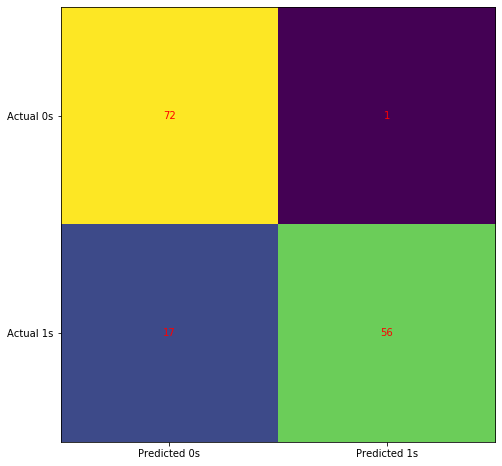

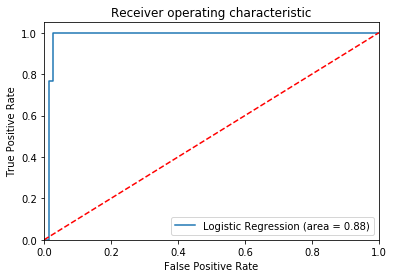

,score,test_error,train_error,intercept,b1,b2,b3,b4,b5
0,0.876712,0.123288,0.241176,0.193603,-1.865225,0.486527,-0.023416,0.101289,-0.176876


In [115]:
results, plot, ROC = log_reg(df_00) #Для примера
results

In [ ]:
# Построение таблицы для 50 кейсов
# list1 = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, ...]
# results =  pd.DataFrame(['score', 'test_error', 'train_error', 'intercept', 'b1', 'b2', 'b3', 'b4', 'b5'])
# for i in list1:
#     for j in range (0,51):
#         df = read_csv('C:\\'+i+'.csv',',')
#         results.iloc[j] = log_ret(df).iloc[0]
# results